<a href="https://colab.research.google.com/github/maeliech/BigDataPhysics/blob/main/midtermBDP_CHANPENG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BigData Physics:

**Maelie CHAN PENG** 

*12224987*

#Midterm week8:
##Big data physics

In [1]:
import numpy as np #importing the needed libraries
import matplotlib.pyplot as plt
import pandas as pd

1. Read california_housing_test.csv and remove rows where median_house_value is equal or 
more than 500000.

In [2]:
house=pd.read_csv('/content/sample_data/california_housing_test.csv')
house #we start by having an overrall look at the dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


1. We only keep the houses whose median value is below 500 000$.

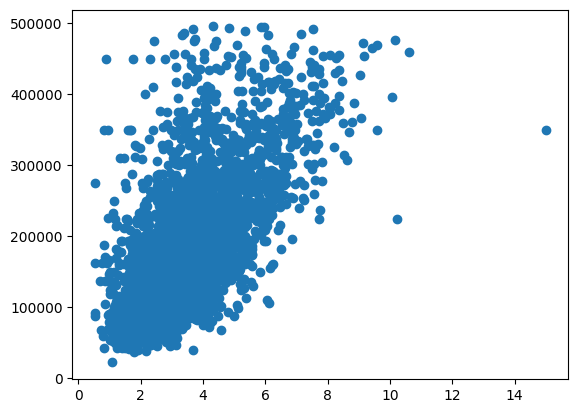

In [3]:
#dropping the houses' values that are above 500K$ and resetting the index
house=house[house['median_house_value']<500000].reset_index(drop=True) 
plt.scatter(house['median_income'],house['median_house_value'])

2. Obtaining 3 variables:

In [4]:
# Setting variables
x1=house['total_rooms']/house['total_bedrooms']
x2=house['median_income']
y=house['median_house_value']

3. Normalizing three variables using the following formula:
Normalized Value = (Value - Mean) / Standard Deviation

In [17]:
#We normalize the data with a simple computation
# to obtain a mean value of 0 and deviation of 1
x1=(x1-x1.mean())/x1.std() 
x2=(x2-x2.mean())/x2.std() 
y= (y-y.mean())/y.std()

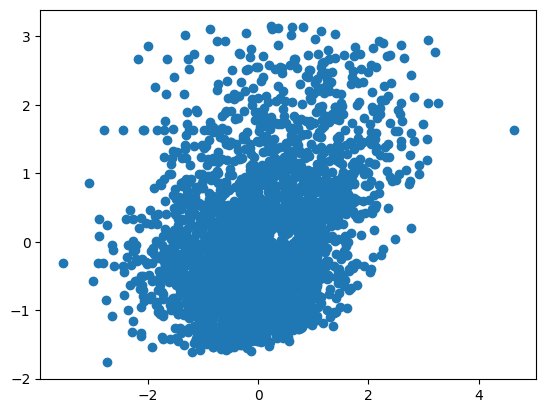

In [6]:
plt.scatter(x1,y) #checking the computation, OK

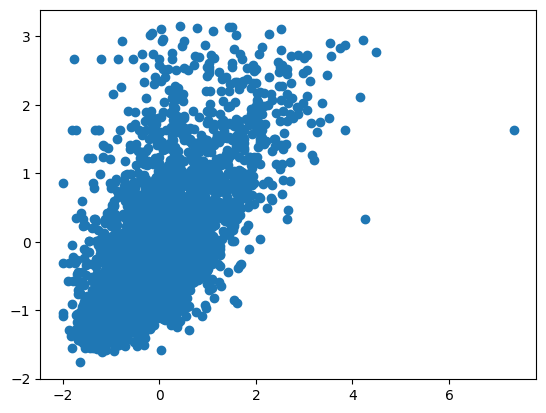

In [7]:
plt.scatter(x2,y) #checking the computation, OK

4. Making a multilinear model: ym = ax1 + bx2 + c



```
# #Setting initial values for the coefficients
a,b,c=2,3,4
# Generate y1 using the multilinear model equation 
y1=a*x1 + b*x2 + c
```



5. Finding optimal parameters using the gradient descent method

In [18]:
#Setting initial values for the coefficients
a,b,c=2,3,4
# generate y1 using the multilinear model equation 
y1=a*x1 + b*x2 + c

# we define MSE function
def loss_function(y_pred, y_actual):
    return np.mean((y_pred - y_actual)**2)

# Initialize the starting values of a, b, and c
a_init = 0.5
b_init = 0.5
c_init = 0.5

learning_rate = 0.001 #learning rate of the gradient descent
num_iterations = 10000 #number of iterations to perform

for i in range(num_iterations): #gradient descent method
    y1_pred = a_init * x1 + b_init * x2 + c_init #prediction of y1 using a,b,c

    grad_a = np.mean(2 * x1 * (y1_pred - y1)) #computing each gradient for each coefficients of the MSE
    grad_b = np.mean(2 * x2 * (y1_pred - y1))
    grad_c = np.mean(2 * (y1_pred - y1))

    a_init -= learning_rate * grad_a #updating the coefficients' values using the gradients
    b_init -= learning_rate * grad_b
    c_init -= learning_rate * grad_c

# displaying the optimized values of a, b, and c
print("Optimized a:", a_init)
print("Optimized b:", b_init)
print("Optimized c:", c_init)


Optimized a: 2.0035645464992
Optimized b: 2.9964354535007978
Optimized c: 3.9999999929289984


6. Plotting two figures: scatter and regression line

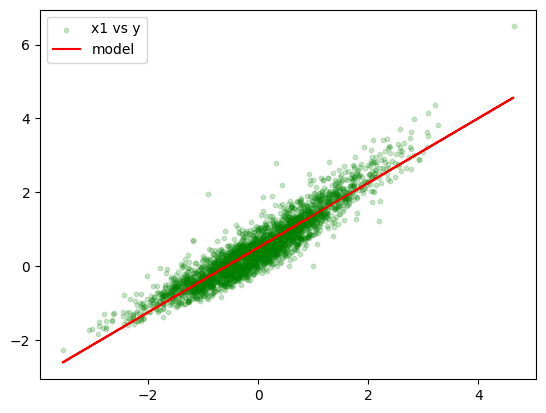

In [10]:
#Figure 1: first method
x=x1 #setting the variables to use
y=y1

#using the method seen during labs
slope=(np.mean(x*y)-np.mean(x)*np.mean(y))/np.std(x)**2
intercept=(np.mean(x*x)*np.mean(y)-np.mean(x*y)*np.mean(x))/np.std(x)**2

model=lambda x: x*slope+intercept

plt.scatter(x,y,label='x1 vs y',s=10,alpha=0.2,c='g' ) 
plt.plot(x,model(x),label='model',c='r')
plt.legend()

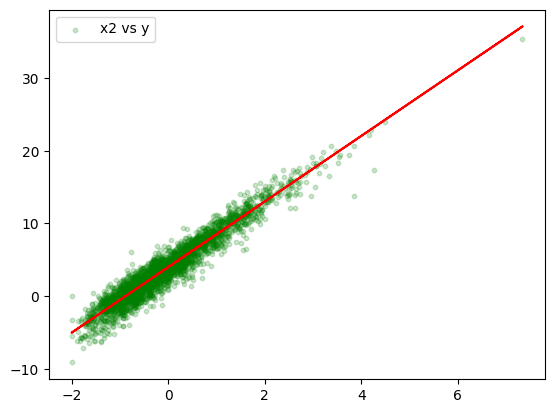

In [24]:
#Figure 2: another method
x=x2 #setting the variables to use
y=y1

plt.scatter(x,y,label='x2 vs y',s=10,alpha=0.2,c='g' )
m, d = np.polyfit(x, y, 1) #least square method
plt.plot(x, m*x+d, color='red')
plt.legend()